## **Importing Libraries**

In [ ]:
import os
import numpy as np
import math
import copy
import random
import datetime
import pandas as pd
import copy
from scipy.optimize import minimize_scalar

In [ ]:
np.random.normal(0,1,1)

array([0.43354964])

Plotting actual reward function and getting it's maxima

In [ ]:
#Getting actual reward value
def f(x):
  return (10+100*x-(x**2))
max_x = minimize_scalar(lambda x: -f(x),bounds=(0, 100), method='bounded')
max_act = max_x.x
print('Actual Reward maxima at :',max_act)
print('Actual Reward maximum value:',f(max_x.x))

Actual Reward maxima at : 50.0
Actual Reward maximum value: 2510.0


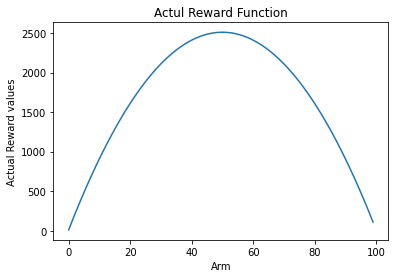

In [ ]:
import matplotlib.pyplot as plt
act_rew_val = []
x_axis = np.arange(0,100,1)
for i in range(0,100):
  act_rew_val.append(f(i))
plt.plot(x_axis,act_rew_val)
plt.xlabel('Arm')
plt.ylabel('Actual Reward values')
plt.title('Actul Reward Function')
plt.show()

Function to update matrix A

In [ ]:
#update LAMBDA
def update_A(a):
  A = np.array([[1,a,a**2]])
  return np.matmul(np.transpose(A),A)

Function to update B vector

In [ ]:
# update bb
def updateBB(a):
  B = np.array([[1,a,a**2]])
  return np.transpose(B)

Main Function

In [ ]:
## Initializing parameters and hyperparameters

# Total time step
T = 15000
# Intializing value of lambda which helps in initializing matrix A
lambd = 1

## For initial e_t*T iteration we will choose action
e_t = 0.09

# Matrix A which updates theta, here written as LAMBDA
LAMBDA = lambd * np.identity(3, dtype= np.double)
print('A0: \n', LAMBDA)

# B vector which also updates theta, here written as bb
bb = np.zeros((3,1),dtype= np.double)
print('b0: \n',bb)

# Initializing theta 
np.random.seed(0)
theta = np.random.normal(0,1/3,size=(3,1))
print('theta0: \n',theta)

# Alpha will control exploitation-exploration trade-off
alpha = 1

# It will store cumulative regret
result_neuralucb = []
summ = 0

# Store all values of action choosen
action_chosen = []

# Loop 10,000 iteration
for t in range(0, T):
    a_sol = np.linalg.inv(LAMBDA)  #A0 inverse
    
    # Defining function

    # Norm of vector
    norm1 = (lambda x : (a_sol[2][2]*(x**4)+ (a_sol[1][2]+a_sol[2][1])*x**3 + (a_sol[0][2]+a_sol[1][1]+a_sol[2][0])*(x**2) + (a_sol[0][1]+a_sol[1][0])*x + a_sol[0][0]))
    
    ## Function will choose best arm 
    ucb = (lambda x : theta[0][0]*1+theta[1][0]*x+theta[2][0]*(x**2) + alpha * np.sqrt(norm1(x)))
    if (t<e_t*T):
        a_c = max_act

    else:
        #choosen arm, maximum of ucb function will get us best arm
        a_choose = minimize_scalar(lambda x: -ucb(x),bounds=(0, 100), method='bounded')
        a_c = a_choose.x

    # Current Reward
    rew = np.matmul(np.array([[1,a_c,a_c**2]]),theta) + (np.random.normal(0,1,1))
    # actual reward
    act_rew = 10+100*(a_c)-((a_c)**2)
    # difference between actual and current reward
    summ += abs(act_rew-rew.item())
    ## Appending cumulative regret 
    result_neuralucb.append(summ)
    ## Appending action choosen at all iteration
    action_chosen.append(a_c)
    
    # update LAMBDA and bb
    LAMBDA += update_A(a_c)
    bb += rew * updateBB(a_c)
    aa = np.linalg.inv(LAMBDA)
    theta = np.matmul(aa,bb)
    #### Loop end


print('Theta after ',T,' iteration: \n',theta)
## Storing action choosen by algorithm and cumulative Regret at each iteration in pandas data frame
df =  pd.DataFrame(list(zip(action_chosen,result_neuralucb)),columns=['Action Choosen','Cumulative Regret'])
print(df.head(100))

A0: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
b0: 
 [[0.]
 [0.]
 [0.]]
theta0: 
 [[0.58801745]
 [0.13338574]
 [0.32624599]]
Theta after  15000  iteration: 
 [[-0.00065039]
 [-0.02014475]
 [ 0.33085626]]
    Action Choosen  Cumulative Regret
0             50.0        1684.886816
1             50.0        3367.906206
2             50.0        5052.836652
3             50.0        6736.165492
4             50.0        8420.358255
..             ...                ...
95            50.0      161646.644046
96            50.0      163330.061267
97            50.0      165011.993182
98            50.0      166697.136791
99            50.0      168382.216740

[100 rows x 2 columns]


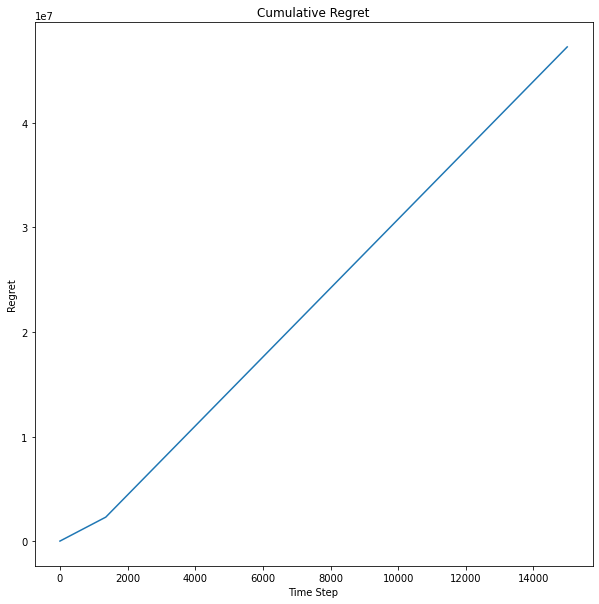

In [ ]:
# Cumulative Regret plot
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(result_neuralucb)
plt.xlabel('Time Step')
plt.ylabel('Regret')
plt.title('Cumulative Regret')
f.savefig('regret.png')
plt.show()